# COVID-19 Auswertung - WHO - new cases, deaths

## import libraries

In [1]:
Programm_Name = "WHO_World" # 04.01.2021 - Time Series Impffdaten erstellen

### Speicherorte und Dateinamen Plots

In [2]:
Laufwerk = "D:\\"
pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"

name_8_1 = "plot_8-1_cases_world.png" # deaths Deutschland
name_output_df = 'Dataframes\\data_WHO_data_world.csv'
name_performance = 'Dataframes\\df_performance.csv'

In [3]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import matplotlib.dates as mdates
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# performance
from datetime import datetime, timedelta
from datetime import date # todays date
#import seaborn as sns

import os
now = datetime.now()

In [4]:

# Datum einstellen 
minticks = 14
maxticks = 30


# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [5]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1.3
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [6]:
pE = 100_000

## Länder Farben

In [7]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange

# Preprocessing Dataframes

In [8]:
today = date.today().strftime("%d.%m.%Y")
size = 25

## Datenimport

In [9]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
data.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0


In [10]:
df = data

In [11]:
# df = df[ ['Date_reported', 'WHO_region', 'New_cases'] ].groupby( [ df["Date_reported"], df["WHO_region"] ] ).sum()
# df = df.reset_index()
# df

In [12]:
df = df[ ['Date_reported', 'WHO_region', 'New_cases'] ].groupby( [ df["Date_reported"], df["WHO_region"] ] ).sum().transpose().stack(0).reset_index()
df['Date_reported'] = pd.to_datetime(df.Date_reported)


df['MA_AFRO'] = df['AFRO'].rolling(window=7,min_periods=1).mean()
df['MA_AMRO'] = df['AMRO'].rolling(window=7,min_periods=1).mean()
df['MA_EMRO'] = df['EMRO'].rolling(window=7,min_periods=1).mean()
df['MA_EURO'] = df['EURO'].rolling(window=7,min_periods=1).mean()
df['MA_SEARO'] = df['SEARO'].rolling(window=7,min_periods=1).mean()
df['MA_WPRO'] = df['WPRO'].rolling(window=7,min_periods=1).mean()

df.head(2)

WHO_region,level_0,Date_reported,AFRO,AMRO,EMRO,EURO,Other,SEARO,WPRO,MA_AFRO,MA_AMRO,MA_EMRO,MA_EURO,MA_SEARO,MA_WPRO
0,New_cases,2020-01-03,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,New_cases,2020-01-04,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.5


In [13]:
# df = df[ ['Date_reported', 'WHO_region', 'New_cases'] ].groupby("WHO_region").sum().sort_values(by='New_cases', ascending=False).head()
# df

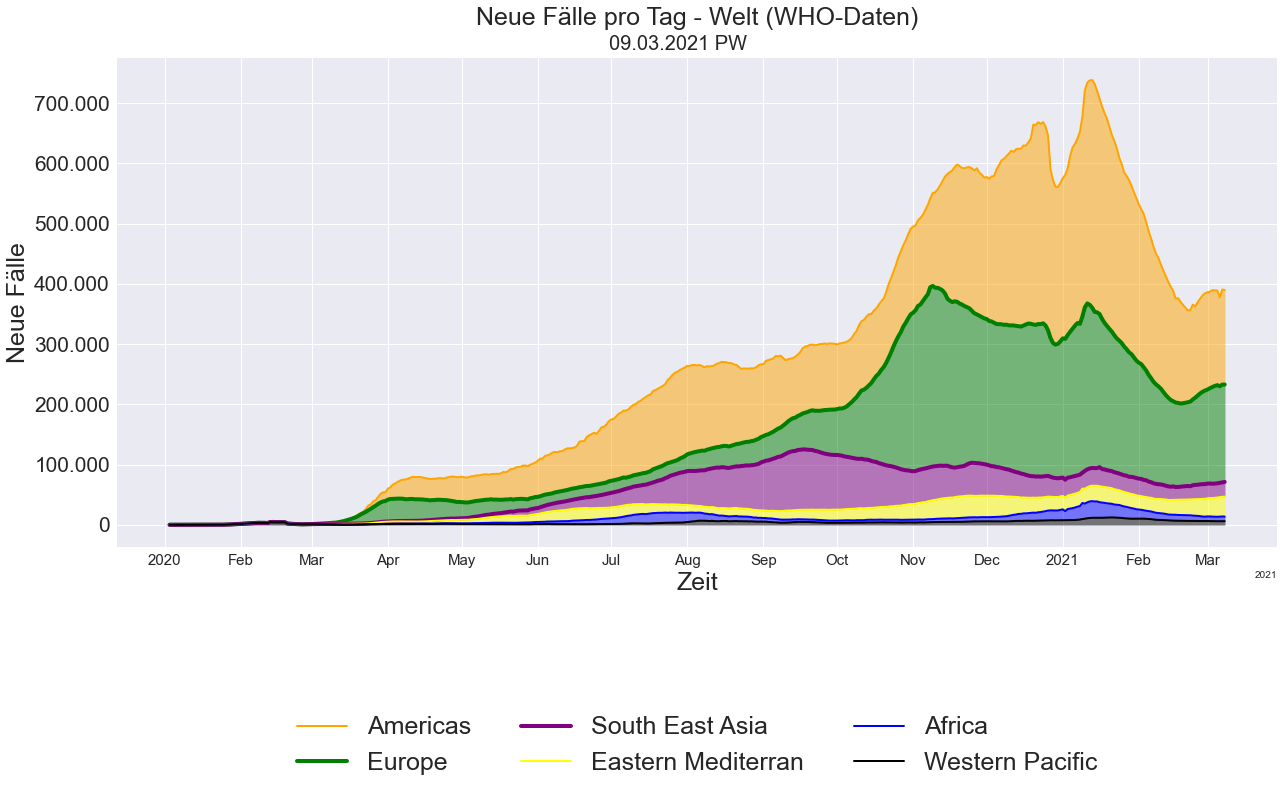

In [14]:
# plt.figure(figsize=(16,9))

plt.style.use('seaborn')

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)

# df['MA_AFRO'] = df['AFRO'].rolling(window=7,min_periods=1).mean()
# df['MA_AMRO'] = df['AMRO'].rolling(window=7,min_periods=1).mean()
# df['MA_EMRO'] = df['EMRO'].rolling(window=7,min_periods=1).mean()
# df['MA_EURO'] = df['EURO'].rolling(window=7,min_periods=1).mean()
# df['MA_SEARO'] = df['SEARO'].rolling(window=7,min_periods=1).mean()
# df['MA_WPRO'] = df['WPRO'].rolling(window=7,min_periods=1).mean()

plt.plot(df.Date_reported,
         df['MA_AMRO']+df['MA_EURO']+df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
         color='orange', 
         linestyle = 'solid', 
         linewidth = 2, 
         label = "Americas")

plt.plot(df.Date_reported,
         df['MA_EURO']+df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
         color='green', 
         linestyle = 'solid', 
         linewidth = 4, 
         label = "Europe")

plt.plot(df.Date_reported,
         df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
         color='purple', 
         linestyle = 'solid', 
         linewidth = 4, 
         label = "South East Asia")

plt.plot(df.Date_reported,
         df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
         color='yellow', 
         linestyle = 'solid', 
         linewidth = 2, 
         label = "Eastern Mediterran")

plt.plot(df.Date_reported,
         df['MA_AFRO']+df['MA_WPRO'], 
         color='blue', 
         linestyle = 'solid', 
         linewidth = 2, 
         label = "Africa")

plt.plot(df.Date_reported,
         df['MA_WPRO'], 
         color='black', 
         linestyle = 'solid', 
         linewidth = 2, 
         label = "Western Pacific")



# fill area between lines
plt.fill_between(df.Date_reported,
                 df['MA_AMRO']+df['MA_EURO']+df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
                 df['MA_EURO']+df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'] , color='orange',alpha=0.5)

plt.fill_between(df.Date_reported,
                 df['MA_EURO']+df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
                 df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'] , color='green',alpha=0.5)

plt.fill_between(df.Date_reported,
                 df['MA_SEARO']+df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
                 df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], color='purple',alpha=0.5)

plt.fill_between(df.Date_reported,
                 df['MA_EMRO']+df['MA_AFRO']+df['MA_WPRO'], 
                 df['MA_AFRO']+df['MA_WPRO'], color='yellow',alpha=0.5)

plt.fill_between(df.Date_reported,
                 df['MA_AFRO']+df['MA_WPRO'], 
                 df['MA_WPRO'], color='blue',alpha=0.5)

plt.fill_between(df.Date_reported,
                 df['MA_WPRO'], 
                 color='black',alpha=0.5)


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=0)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - Welt (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.915)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_8_1, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_8_1, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## preprocessing

In [15]:
# #gleitender Mittelwert der cases und deaths, 7 Tage
# data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
# data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

# data['MSTD_cases'] = data['New_cases'].rolling(window=7,min_periods=1).std()
# data['MSTD_deaths'] = data['New_deaths'].rolling(window=7,min_periods=1).std()

# data['OTG_cases'] = data['MA'] + data['MSTD_cases']
# data['UTG_cases'] = data['MA'] - data['MSTD_cases']

# data['OTG_deaths'] = data['MA_deaths'] + data['MSTD_deaths']
# data['UTG_deaths'] = data['MA_deaths'] - data['MSTD_deaths']

# # Date_reported in eine Datumsspalte umwandeln
# data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)

# #Timestamp definieren  YYYY-MM-DD
# ts = pd.to_datetime('2020-10-01', utc=True)

# # Zeit eingrenzen
# data = data.loc[data.Date_reported >= ts, :]

# data = data.drop(columns=['Country_code', 'WHO_region', 'Cumulative_cases', 'Cumulative_deaths'])

# data.head(1)

### Einwohnerzahlen

# Visualisierung der Plots

## dataframes speichern

In [16]:
df.to_csv(Laufwerk + pfad_output + name_output_df, index=False)

## Performance messen

In [17]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 2.38 seconds
